# Regression Analysis

This Jupyter Notebook is part of the time travel distance project. In this notebook we use linear regression to estimate the travel duration between the Tübinger town hall (start location) and various places in Tübingen. 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
# read data
df = pd.read_csv('data/combined_data.csv')

In [3]:
# convert to dummy variables
df['isWalking'] = df['mode'].isin(['walking'])
df['isBicycling'] = df['mode'].isin(['bicycling', 'walking'])

# Only horizontal Model

In this model, we only consider the horizontal distance (for each mean of transport seperately) as predictor. 

In [4]:
# create and fit model
model_horiz = smf.ols(formula='duration ~ distance_horizontal + distance_horizontal:isBicycling + distance_horizontal:isWalking', data=df)
fit_horiz = model_horiz.fit()

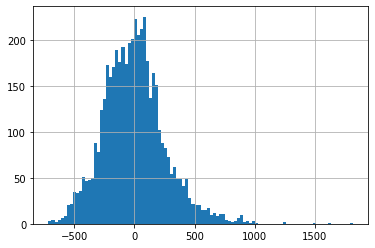

In [5]:
# residuals plot
fit_horiz.resid.hist(bins=100);

In [6]:
fit_horiz.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 1.699e+04
Date:                Sat, 22 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:09:47   Log-Likelihood:                -33478.
No. Observations:                4800   AIC:                         6.696e+04
Df Residuals:                    4796   BIC:                         6.699e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 197.7785     10.632     18.602      0.000     176.935     218.622
distance_horizontal                         0.1911      0.005     39.612      0.000       0.182       0.201
distance_horizontal:isBicycling[T.True]     0.1471      0.004     39.522      0.000       0.140       0.154
distance_horizontal:isWalking[T.True]       0.5514      0.004    148.057      0.000       0.544       0.559
==============================================================================
Omnibus:                      493.049   Durbin-Watson:                   0.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1007.245
Skew:                           0.658   Prob(JB):                    1.90e-219
Kurtosis:                       4.818   Cond. No.                     9.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Only vertical Model

In this model, we only consider the vertical distance (for each mean of transport seperately) as predictor. 

In [7]:
# create and fit model
model_vertic = smf.ols(formula='duration ~ distance_vertical + distance_vertical:isBicycling + distance_vertical:isWalking', data=df)
fit_vertic = model_vertic.fit()

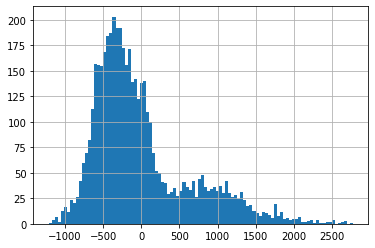

In [8]:
# residuals plot
fit_vertic.resid.hist(bins=100);

In [9]:
fit_vertic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     1378.
Date:                Sat, 22 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:09:47   Log-Likelihood:                -37874.
No. Observations:                4800   AIC:                         7.576e+04
Df Residuals:                    4796   BIC:                         7.578e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              1056.6214     11.712     90.219      0.000    1033.661    1079.582
distance_vertical                        -2.9399      0.282    -10.442      0.000      -3.492      -2.388
distance_vertical:isBicycling[T.True]     6.3937      0.359     17.827      0.000       5.691       7.097
distance_vertical:isWalking[T.True]      13.0261      0.351     37.138      0.000      12.338      13.714
==============================================================================
Omnibus:                      922.446   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.947
Skew:                           1.252   Prob(JB):                         0.00
Kurtosis:                       4.301   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Combined Model

In this model, we consider the horizontal distance (for each mean of transport seperately) and the  vertical distance (for each mean of transport seperately) as predictors. 

In [10]:
# create and fit
model_combi = smf.ols(formula='duration ~ distance_horizontal + distance_horizontal:isBicycling + distance_horizontal:isWalking + distance_vertical + distance_vertical:isBicycling + distance_vertical:isWalking', data=df)
fit_combi = model_combi.fit()

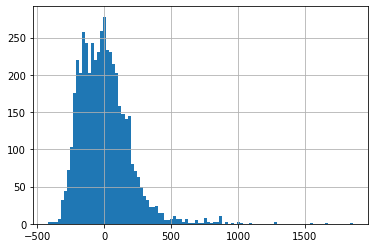

In [11]:
# residuals plot
fit_combi.resid.hist(bins=100);

In [12]:
fit_combi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 1.671e+04
Date:                Sat, 22 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:09:48   Log-Likelihood:                -31956.
No. Observations:                4800   AIC:                         6.393e+04
Df Residuals:                    4793   BIC:                         6.397e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 232.0232      7.772     29.855      0.000     216.787     247.259
distance_horizontal                         0.1708      0.004     43.268      0.000       0.163       0.179
distance_horizontal:isBicycling[T.True]     0.0583      0.004     16.096      0.000       0.051       0.065
distance_horizontal:isWalking[T.True]       0.5849      0.004    158.883      0.000       0.578       0.592
distance_vertical                           0.4397      0.100      4.412      0.000       0.244       0.635
distance_vertical:isBicycling[T.True]       4.9179      0.140     35.199      0.000       4.644       5.192
distance_vertical:isWalking[T.True]        -1.8777      0.139    -13.534      0.000      -2.150      -1.606
==============================================================================
Omnibus:                     1864.913   Durbin-Watson:                   0.615
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13733.715
Skew:                           1.671   Prob(JB):                         0.00
Kurtosis:                      10.582   Cond. No.                     9.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Pro Meter horizontaler Distanz braucht man mit dem Auto 0.17 Sekunden.
Pro Meter horizontaler Distanz braucht man mit dem Fahrrad 0.23 Sekunden.
Pro Meter horizontaler Distanz braucht man zu Fuß 0.81 Sekunden.

--> Auf flachen Strecken sind die Zeiten von Fahrad und Auto also sehr ähnlich. 
--> Fußweg braucht länger.

Pro Meter vertikaler Distanz braucht man mit dem Auto 0.44 Sekunden.
Pro Meter horizontaler Distanz braucht man mit dem Fahrrad 5.36 Sekunden.
Pro Meter horizontaler Distanz braucht man zu Fuß 3.5 Sekunden.

--> Bei ansteigenden Strecken büßt besonders das Fahrrad ein. 
--> Das Auto hat kaum Mehrzeiten wegen des Hügels.
--> Zu Fuß verliert man weniger als das Fahrrad, was mit der gerinden GRundgeschwindigkeit zusammenhängen wird.

Das ist vielleicht einer der Gründe wieso in hügeligen Städten weniger Fahrrad gefahren wird. Es ist tatsähclich eine kluge Entscheidung da der relative Verlust am Berg am größten ist. 

In [13]:
Image(url= "https://nationaler-radverkehrsplan.de/sites/default/files/images/nachrichten/srv-2018-06-weghaeufigkeit-vergleich-fahrrad-pedelec-topografie.jpg")

# Comparison

### BIC

In [14]:
print('Only Vertical: \t\t', round(fit_vertic.bic))
print('Only Horizontal: \t', round(fit_horiz.bic))
print('Horizontal + Vertical: \t', round(fit_combi.bic))

Only Vertical: 		 75782.0
Only Horizontal: 	 66989.0
Horizontal + Vertical: 	 63971.0


### Mean absolute error

In [15]:
print('Only Vertical: \t\t', round(np.mean(np.abs(fit_vertic.resid))/60, 2))
print('Only Horizontal: \t', round(np.mean(np.abs(fit_horiz.resid))/60, 2))
print('Horizontal + Vertical: \t', round(np.mean(np.abs(fit_combi.resid))/60, 2))

Only Vertical: 		 8.23
Only Horizontal: 	 3.29
Horizontal + Vertical: 	 2.33


In [16]:
# horizontal model better than vertical model
# combined model better than horiziontal model

# most information in horiziontal but vertical adds enough information to 
# justify higher complexity

## Store residuals

In [17]:
df['resid_combi'] = fit_combi.resid
df['resid_horiz'] = fit_horiz.resid
df['resid_vertic'] = fit_vertic.resid
df.to_csv('data/combined_data_residuals.csv')

## Store models

In [18]:
fit_combi.save("models/fit_combi.pickle")
fit_horiz.save("models/fit_horiz.pickle")
fit_vertic.save("models/fit_vertic.pickle")